In [1]:

#importando as bibliotecas
import pandas as pd 
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(rc={'axes.facecolor':'#202124', 'figure.facecolor':'lightgrey'})


In [2]:
# Exibindo os dados de cada ano
files = [file for file in os.listdir(r'C:/Users/kpaul/OneDrive/Data Analytics/Python/Project/EGP/dados')]
for file in files:
    print(file)

Egp.pdf
finbra_2017.csv
finbra_2018.csv
finbra_2019.csv
finbra_2020.csv
finbra_2021.csv


In [3]:
#Juntando todos os dados para criar um data base unico
path = r'C:/Users/kpaul/OneDrive/Data Analytics/Python/Project/EGP/dados'
all_data = pd.DataFrame()  # criando um database vazio

for file in files:
    current_data = pd.read_csv(path+'/'+file, sep=';', encoding='latin1')
    all_data = pd.concat([all_data , current_data])
print(all_data)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 20, saw 2


In [ ]:
all_data.to_csv(path + "/all_data.csv", index = False )

In [ ]:
#Exibindo as primeiras linhas dos dados
all_data.head()

,Instituição,Cod.IBGE,UF,População,Coluna,Conta,Identificador da Conta,Valor,Ano
0,Governo do Estado do Mato Grosso,51,MT,3305531,Despesas Empenhadas,Despesas Exceto Intraorçamentárias,siconfi-cor_TotalDespesas,16808633403,2017
1,Governo do Estado do Mato Grosso,51,MT,3305531,Despesas Empenhadas,01 - Legislativa,siconfi-cor_TotalDespesas,"687932086,3",2017
2,Governo do Estado do Mato Grosso,51,MT,3305531,Despesas Empenhadas,01.031 - Ação Legislativa,siconfi-cor_TotalDespesas,"422143,98",2017
3,Governo do Estado do Mato Grosso,51,MT,3305531,Despesas Empenhadas,01.032 - Controle Externo,siconfi-cor_TotalDespesas,"47728708,12",2017
4,Governo do Estado do Mato Grosso,51,MT,3305531,Despesas Empenhadas,01.122 - Administração Geral,siconfi-cor_TotalDespesas,"582546800,9",2017


In [ ]:
all_data['Valor'] = all_data['Valor'].str.replace(',', '.') #Substituindo a virgula da coluna valor por um ponto
all_data['Valor'] = all_data['Valor'].astype(float) #Convertando a coluna valor em numero
all_data['Cod.IBGE'] = all_data['Cod.IBGE'].astype(str) # Convertando a coluna Cod.Ibge em string
all_data.rename(columns={'Coluna': 'Tipo de Despesa'}, inplace = True) #Renomeando a coluna

In [ ]:
all_data.shape #verificanco o numero de linhas e de colunas do dataframe

(74379, 9)

In [ ]:
all_data

,Instituição,Cod.IBGE,UF,População,Tipo de Despesa,Conta,Identificador da Conta,Valor,Ano
0,Governo do Estado do Mato Grosso,51,MT,3305531,Despesas Empenhadas,Despesas Exceto Intraorçamentárias,siconfi-cor_TotalDespesas,1.680863e+10,2017
1,Governo do Estado do Mato Grosso,51,MT,3305531,Despesas Empenhadas,01 - Legislativa,siconfi-cor_TotalDespesas,6.879321e+08,2017
2,Governo do Estado do Mato Grosso,51,MT,3305531,Despesas Empenhadas,01.031 - Ação Legislativa,siconfi-cor_TotalDespesas,4.221440e+05,2017
3,Governo do Estado do Mato Grosso,51,MT,3305531,Despesas Empenhadas,01.032 - Controle Externo,siconfi-cor_TotalDespesas,4.772871e+07,2017
4,Governo do Estado do Mato Grosso,51,MT,3305531,Despesas Empenhadas,01.122 - Administração Geral,siconfi-cor_TotalDespesas,5.825468e+08,2017
...,...,...,...,...,...,...,...,...,...
14770,Governo do Estado de Roraima,14,RR,631181,Inscrição de Restos a Pagar Processados,26.782 - Transporte Rodoviário,siconfi-cor_TotalDespesas,1.298341e+05,2021
14771,Governo do Estado de Roraima,14,RR,631181,Inscrição de Restos a Pagar Processados,27 - Desporto e Lazer,siconfi-cor_TotalDespesas,1.954263e+05,2021
14772,Governo do Estado de Roraima,14,RR,631181,Inscrição de Restos a Pagar Processados,27.811 - Desporto de Rendimento,siconfi-cor_TotalDespesas,6.682500e+04,2021
14773,Governo do Estado de Roraima,14,RR,631181,Inscrição de Restos a Pagar Processados,27.812 - Desporto Comunitário,siconfi-cor_TotalDespesas,1.286013e+05,2021


In [ ]:
#agora vamos pegar só as linhas que contem a conta 06 - Segurança Pública
df_filtrado = all_data.query("Conta == '06 - Segurança Pública'")
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666 entries, 26 to 14723
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Instituição             666 non-null    object 
 1   Cod.IBGE                666 non-null    object 
 2   UF                      666 non-null    object 
 3   População               666 non-null    int64  
 4   Tipo de Despesa         666 non-null    object 
 5   Conta                   666 non-null    object 
 6   Identificador da Conta  666 non-null    object 
 7   Valor                   666 non-null    float64
 8   Ano                     666 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 52.0+ KB


In [ ]:
df_filtrado.sample(20)

,Instituição,Cod.IBGE,UF,População,Tipo de Despesa,Conta,Identificador da Conta,Valor,Ano
2228,Governo do Estado de Pernambuco,26,PE,9410336,Despesas Pagas,06 - Segurança Pública,siconfi-cor_TotalDespesas,2.712647e+09,2018
13502,Governo do Estado de Roraima,14,RR,605761,Despesas Liquidadas,06 - Segurança Pública,siconfi-cor_TotalDespesas,3.789601e+08,2020
13151,Governo do Estado do Pará,15,PA,8690745,Despesas Empenhadas,06 - Segurança Pública,siconfi-cor_TotalDespesas,3.271816e+09,2021
11993,Governo do Estado do Rio de Janeiro,33,RJ,17366189,Inscrição de Restos a Pagar Processados,06 - Segurança Pública,siconfi-cor_TotalDespesas,1.488909e+08,2021
8178,Governo do Estado do Pará,15,PA,8513497,Despesas Empenhadas,06 - Segurança Pública,siconfi-cor_TotalDespesas,2.851853e+09,2019
2492,Governo do Estado do Pará,15,PA,8272724,Despesas Empenhadas,06 - Segurança Pública,siconfi-cor_TotalDespesas,2.711633e+09,2018
5260,Governo do Estado do Maranhão,21,MA,6954036,Despesas Empenhadas,06 - Segurança Pública,siconfi-cor_TotalDespesas,1.849647e+09,2018
1828,Governo do Estado de Rondônia,11,RO,1787279,Despesas Liquidadas,06 - Segurança Pública,siconfi-cor_TotalDespesas,7.795238e+08,2017
5210,Governo do Estado do Amapá,16,AP,829494,Inscrição de Restos a Pagar Processados,06 - Segurança Pública,siconfi-cor_TotalDespesas,1.698964e+08,2019
6518,Governo do Estado do Ceará,23,CE,9075649,Despesas Liquidadas,06 - Segurança Pública,siconfi-cor_TotalDespesas,2.698890e+09,2019


In [ ]:
# verificando se há dados nulos em uma das colunas
(df_filtrado.isnull().sum()/len(df_filtrado)*100).sort_values(ascending=False) 

Instituição               0.0
Cod.IBGE                  0.0
UF                        0.0
População                 0.0
Tipo de Despesa           0.0
Conta                     0.0
Identificador da Conta    0.0
Valor                     0.0
Ano                       0.0
dtype: float64

In [ ]:
#analise descritiva no das variaveis quantitativas

,População,Valor,Ano
count,6.660000e+02,6.660000e+02,666.000000
mean,7.740456e+06,1.848780e+09,2019.007508
std,9.060356e+06,2.991035e+09,1.414725
min,5.142290e+05,4.689493e+04,2017.000000
25%,2.786588e+06,5.664501e+07,2018.000000
50%,4.001667e+06,8.455845e+08,2019.000000
75%,9.410336e+06,2.271558e+09,2020.000000
max,4.628933e+07,1.639873e+10,2021.000000


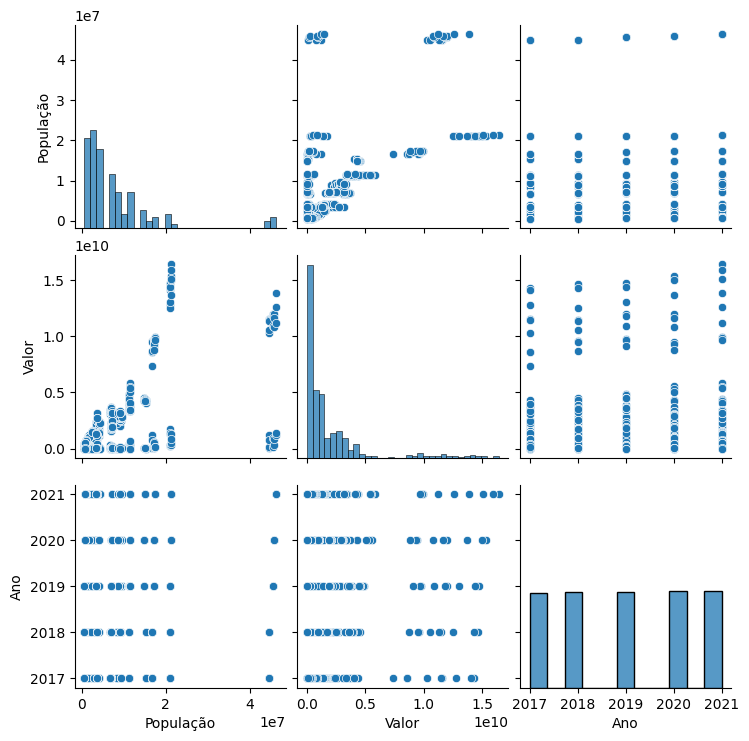

In [ ]:
sns.pairplot(df_filtrado)

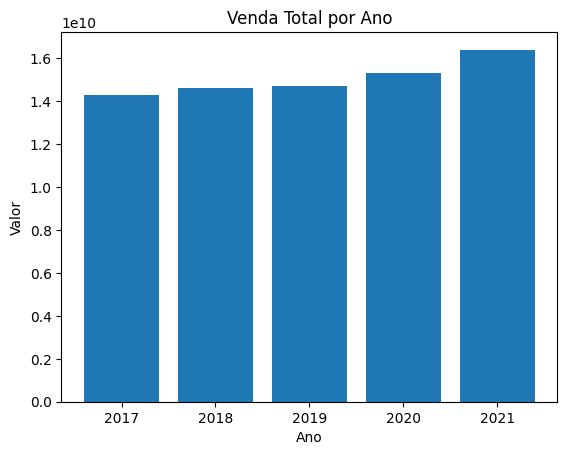

In [ ]:
fig , ax = plt.subplots()

ax.bar(df_filtrado['Ano'], df_filtrado['Valor'])

plt.xlabel('Ano')
plt.ylabel('Valor')
plt.title('Venda Total por Ano')

plt.show()



([<matplotlib.patches.Wedge at 0x1cefec7e740>,
 [Text(1.099373129205974, 0.037131156457409296, ''),
  Text(1.0703372771177677, 0.25372842413124175, ''),
  Text(0.9910907648099838, 0.47722017550430695, ''),
  Text(0.9398162075332214, 0.5716165638414208, ''),
  Text(0.8251233844901228, 0.7274416817639509, ''),
  Text(0.16087498952902984, 1.088172430152517, ''),
  Text(-0.5583349739453117, 0.9477668789683928, ''),
  Text(-0.6867853921157636, 0.8592588813485706, ''),
  Text(-0.7287570451240958, 0.8239618736215873, ''),
  Text(-0.8114955712699127, 0.7426135857963536, ''),
  Text(-0.9011223882539231, 0.6308553252430753, ''),
  Text(-1.0932172632327033, 0.12196727171663108, ''),
  Text(-1.0253610918104856, -0.398289632555517, ''),
  Text(-1.0069967531490411, -0.44267091518111873, ''),
  Text(-0.9601982531258467, -0.5366743097019575, ''),
  Text(-0.8496670787332101, -0.6986171020787948, ''),
  Text(-0.7279401800249503, -0.8246836328588334, ''),
  Text(-0.6193349898702726, -0.90907874814143, ''

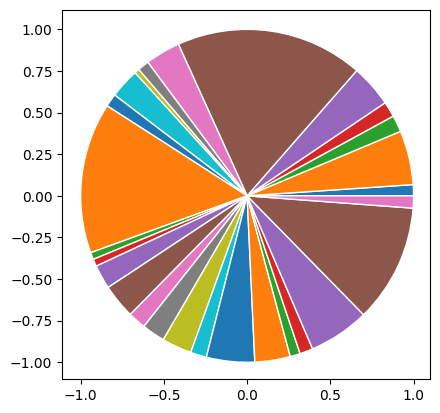

In [ ]:
X = df_filtrado.groupby('Instituição')['Valor'].sum()
colors = plt.get_cmap('Blues')

fig, ax = plt.subplots()
ax.pie(X,
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)